<a href="https://colab.research.google.com/github/MwilaCMumbi/Data-Science-Ecosystem/blob/main/ZSL_Title_Count_Gif_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Goal:**

This project aimed to create an animated bar chart race visualizing the Zambia Premier League title wins over the years. The chart would show the cumulative number of titles each team has won, with the bars representing the teams and their lengths corresponding to the title count.  The animation would progress year by year, showing how the rankings and title counts change over time.  The final output would be a GIF that I could embed in my portfolio.

**Initial Setup and Data:**

I started by manually gathering (scraping) the data which is publicly avaiable on wikipeadia: https://en.wikipedia.org/wiki/Zambia_Super_League, The data initially consisted of the year and the winner of the Zambia Premier League for each year.  I cleaned and organized this data in googlesheet here: https://docs.google.com/spreadsheets/d/1A02C4joz0Xx6UMahAHPXz2jBgNYF8orp2RcxhfiCggs/edit?gid=2147110241#gid=2147110241   

 I then loaded this data into a Pandas DataFrame in my Google Colab notebook

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import imageio

# Your data (replace with your actual data loading if needed)
data = {'Year': [1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        'Winners': ['Roan United (Luanshya)', 'Mufulira Wanderers (Mufulira)', 'City of Lusaka (Lusaka)', 'Mufulira Wanderers (Mufulira)', 'Mufulira Wanderers (Mufulira)', 'Mufulira Wanderers (Mufulira)', 'Kabwe Warriors (Kabwe)', 'Mufulira Wanderers (Mufulira)', 'Kabwe Warriors (Kabwe)', 'Kabwe Warriors (Kabwe)', 'Kabwe Warriors (Kabwe)', 'Zambia Army (Lusaka)', 'Zambia Army (Lusaka)', 'Green Buffaloes (Lusaka)', 'Mufulira Wanderers (Mufulira)', 'Green Buffaloes (Lusaka)', 'Mufulira Wanderers (Mufulira)', 'Green Buffaloes (Lusaka)', 'Nchanga Rangers (Chingola)', 'Green Buffaloes (Lusaka)', 'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Power Dynamos (Kitwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Kabwe Warriors (Kabwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Power Dynamos (Kitwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Power Dynamos (Kitwe)', 'Mufulira Wanderers (Mufulira)', 'Mufulira Wanderers (Mufulira)', 'Power Dynamos (Kitwe)', 'Nchanga Rangers (Chingola)', 'Nkana (Kitwe)', 'Power Dynamos (Kitwe)', 'Nkana (Kitwe)', 'Zanaco', 'Zanaco', 'Red Arrows (Lusaka)', 'Zanaco', 'Zanaco', 'ZESCO United (Ndola)', 'ZESCO United (Ndola)', 'Zanaco', 'ZESCO United (Ndola)', 'Power Dynamos (Kitwe)', 'Zanaco', 'Nkana (Kitwe)', 'ZESCO United (Ndola)', 'ZESCO United (Ndola)', 'Zanaco', 'ZESCO United (Ndola)', 'ZESCO United (Ndola)', 'ZESCO United (Ndola)', 'Nkana (Kitwe)', 'ZESCO United (Ndola)', 'Red Arrows (Lusaka)', 'Power Dynamos (Kitwe)', 'Red Arrows (Lusaka)']}

df = pd.DataFrame(data)


# Calculate title counts
title_counts = df.groupby('Winners').size().reset_index(name='Count')

# Create a dictionary to store cumulative counts for each team
cumulative_counts = {}
for winner in title_counts['Winners']:
    cumulative_counts[winner] = 0

# Prepare data for animation
animated_data = []
for year, winner in zip(df['Year'], df['Winners']):
    cumulative_counts[winner] += 1
    temp_df = title_counts.copy()
    for w in temp_df['Winners']:
      temp_df.loc[temp_df['Winners'] == w, 'Count'] = cumulative_counts[w]
    temp_df['Year'] = year
    animated_data.append(temp_df)

animated_df = pd.concat(animated_data)


def create_bar_chart(df, year):
    df_year = df[df['Year'] == year].sort_values('Count', ascending=False)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.clear()

    bars = ax.barh(df_year['Winners'], df_year['Count'], color='skyblue')

    ax.set_title(f"Year: {year}")
    ax.set_xlabel("Title Count")
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        ax.text(bar.get_width() + 0.2,  # Small offset
                bar.get_y() + bar.get_height()/2,
                f'{bar.get_width():.0f}',
                va='center', ha='left', fontsize=9)  # Smaller font

    return fig


years = animated_df['Year'].unique()

filenames = []
for year in years:
    fig = create_bar_chart(animated_df, year)
    filename = f'frame_{year}.png'
    fig.savefig(filename)
    filenames.append(filename)
    plt.close(fig)

with imageio.get_writer('zambia_league_titles.gif', mode='I', duration=0.3) as writer: # Adjust duration
    for filename in filenames:
        image = imageio.v2.imread(filename)
        writer.append_data(image)

import os
for filename in set(filenames):
    os.remove(filename)

print("GIF created successfully!")

GIF created successfully!


**First Attempt (Basic Animation):**

My initial attempt (below)focused on creating a basic animation. I used matplotlib to create the bar charts for each year and imageio to combine these charts into a GIF.  However, the animation was too fast, and all teams appeared on the chart from the beginning, even before they had won any titles.

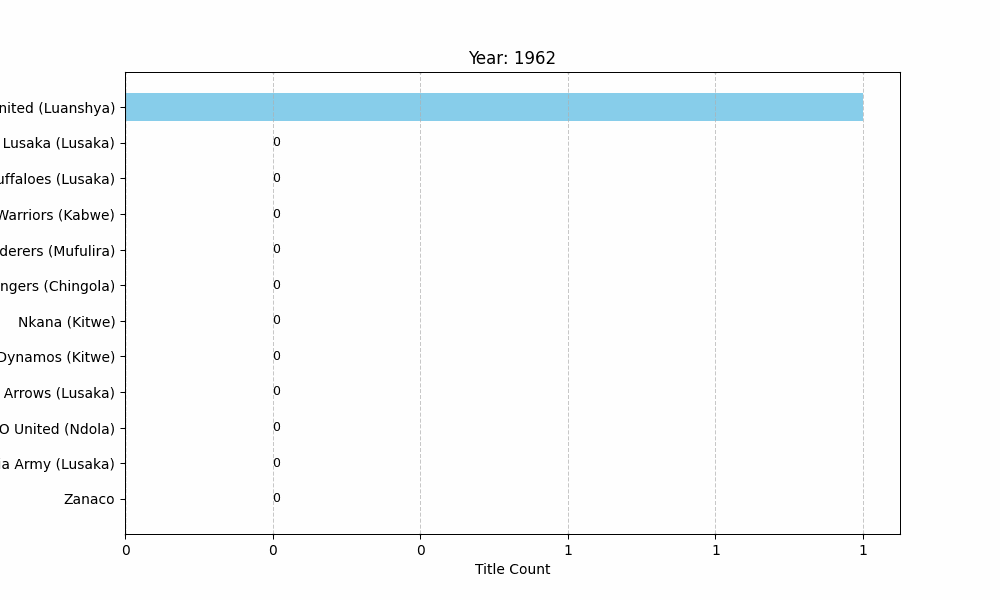

In [ ]:
from IPython.display import Image
Image(filename='zambia_league_titles.gif')

**Iteration 1: Controlling Animation Speed:**

Having realized that the animation speed was crucial.  I learned that the imageio.get_writer() function has a duration parameter that controls the time between frames.  I experimented with different values to find a speed that looked good.

**Iteration 2: Showing Teams Only After First Title:**

The next challenge was to make teams appear on the chart only after they had won their first title.  This required some data manipulation. I used a dictionary to keep track of the cumulative title counts for each team.  Then, within the create_bar_chart function, I filtered the data for each year to include only teams with a title count greater than zero.  This solved the problem of teams appearing prematurely.

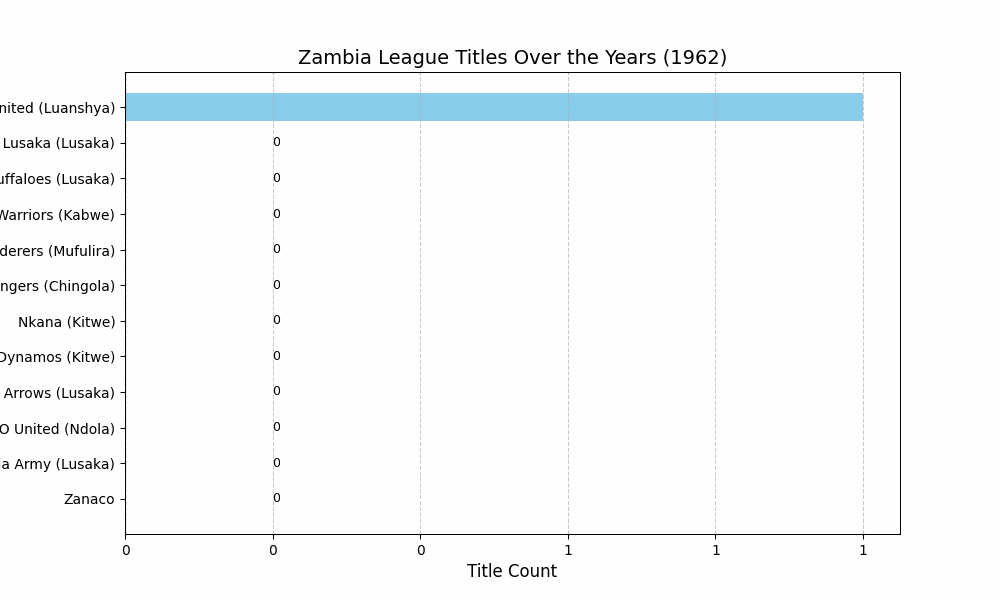

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import imageio
import os

# Your data
data = {'Year': list(range(1962, 2025)),
        'Winners': ['Roan United (Luanshya)', 'Mufulira Wanderers (Mufulira)', 'City of Lusaka (Lusaka)',
                    'Mufulira Wanderers (Mufulira)', 'Mufulira Wanderers (Mufulira)', 'Mufulira Wanderers (Mufulira)',
                    'Kabwe Warriors (Kabwe)', 'Mufulira Wanderers (Mufulira)', 'Kabwe Warriors (Kabwe)', 'Kabwe Warriors (Kabwe)',
                    'Kabwe Warriors (Kabwe)', 'Zambia Army (Lusaka)', 'Zambia Army (Lusaka)', 'Green Buffaloes (Lusaka)',
                    'Mufulira Wanderers (Mufulira)', 'Green Buffaloes (Lusaka)', 'Mufulira Wanderers (Mufulira)',
                    'Green Buffaloes (Lusaka)', 'Nchanga Rangers (Chingola)', 'Green Buffaloes (Lusaka)', 'Nkana (Kitwe)',
                    'Nkana (Kitwe)', 'Power Dynamos (Kitwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Kabwe Warriors (Kabwe)',
                    'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Power Dynamos (Kitwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)',
                    'Power Dynamos (Kitwe)', 'Mufulira Wanderers (Mufulira)', 'Mufulira Wanderers (Mufulira)',
                    'Power Dynamos (Kitwe)', 'Nchanga Rangers (Chingola)', 'Nkana (Kitwe)', 'Power Dynamos (Kitwe)',
                    'Nkana (Kitwe)', 'Zanaco', 'Zanaco', 'Red Arrows (Lusaka)', 'Zanaco', 'Zanaco', 'ZESCO United (Ndola)',
                    'ZESCO United (Ndola)', 'Zanaco', 'ZESCO United (Ndola)', 'Power Dynamos (Kitwe)', 'Zanaco', 'Nkana (Kitwe)',
                    'ZESCO United (Ndola)', 'ZESCO United (Ndola)', 'Zanaco', 'ZESCO United (Ndola)', 'ZESCO United (Ndola)',
                    'ZESCO United (Ndola)', 'Nkana (Kitwe)', 'ZESCO United (Ndola)', 'Red Arrows (Lusaka)', 'Power Dynamos (Kitwe)',
                    'Red Arrows (Lusaka)']}

df = pd.DataFrame(data)

# Calculate title counts
title_counts = df.groupby('Winners').size().reset_index(name='Count')

# Store cumulative counts for each team
cumulative_counts = {winner: 0 for winner in title_counts['Winners']}

# Prepare data for animation
animated_data = []
for year, winner in zip(df['Year'], df['Winners']):
    cumulative_counts[winner] += 1
    temp_df = title_counts.copy()
    for w in temp_df['Winners']:
        temp_df.loc[temp_df['Winners'] == w, 'Count'] = cumulative_counts[w]
    temp_df['Year'] = year
    animated_data.append(temp_df)

animated_df = pd.concat(animated_data)

# Function to create bar chart
def create_bar_chart(df, year):
    df_year = df[df['Year'] == year].sort_values('Count', ascending=False)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.clear()

    bars = ax.barh(df_year['Winners'], df_year['Count'], color='skyblue')

    ax.set_title(f"Zambia League Titles Over the Years ({year})", fontsize=14)
    ax.set_xlabel("Title Count", fontsize=12)
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
                f'{bar.get_width():.0f}', va='center', ha='left', fontsize=9)

    return fig

# Generate frames
years = animated_df['Year'].unique()
filenames = []

for year in years:
    fig = create_bar_chart(animated_df, year)
    filename = f'frame_{year}.png'
    fig.savefig(filename)
    filenames.append(filename)
    plt.close(fig)

# **Set frame duration and duplicate each frame 20 times to slow down the transition**
gif_duration_per_frame = 3  # Frame duration (seconds)
duplicate_per_frame = 20    # Repeat each frame 20 times

# Create GIF
gif_path = 'zambia_league_titles_with_duplicates.gif'
with imageio.get_writer(gif_path, mode='I', duration=gif_duration_per_frame) as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        for _ in range(duplicate_per_frame):  # Duplicate each frame 20 times
            writer.append_data(image)

# Clean up image files
for filename in set(filenames):
    os.remove(filename)

# Display the GIF (if running in Jupyter Notebook)
try:
    from IPython.display import display, Image
    display(Image(filename=gif_path))
except ImportError:
    print("GIF created successfully! Open 'zambia_league_titles_with_duplicates.gif' to view.")



**Final Code and Output:**

After these iterations, I had a working animation that showed the correct title counts and rankings for each year, with teams appearing only after they had won a title, and with a good pace. The final code combined the data loading, cumulative count calculation, the improved create_bar_chart function, and the GIF creation using imageio with the chosen duration.  I also added code to clean up the individual PNG files used to create the GIF.  Finally, I used IPython.display.Image to display the GIF directly in the Colab notebook for a quick preview.

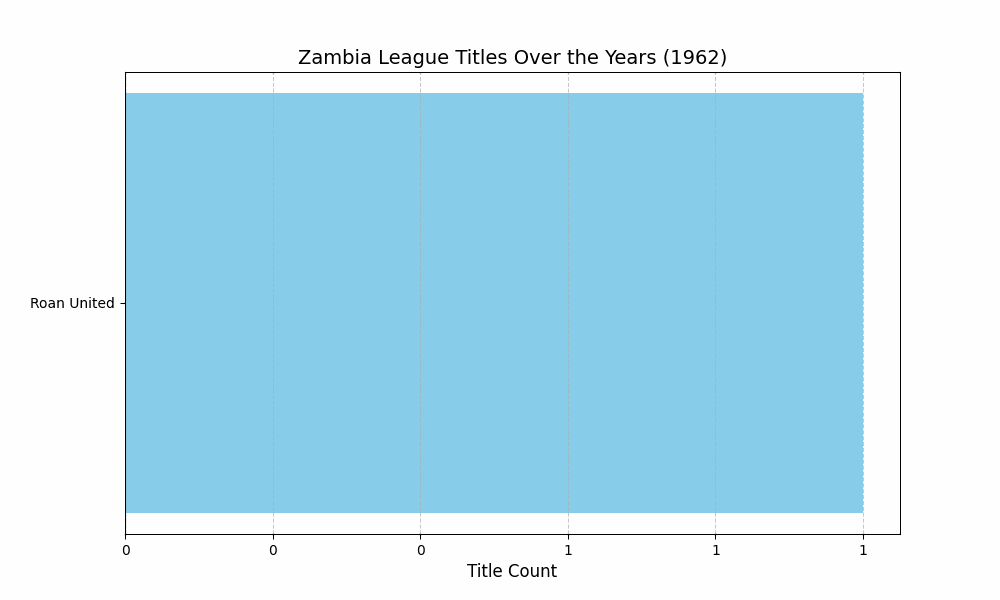

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import imageio
import os

# Your data
data = {'Year': list(range(1962, 2025)),
        'Winners': ['Roan United (Luanshya)', 'Mufulira Wanderers (Mufulira)', 'City of Lusaka (Lusaka)',
                    'Mufulira Wanderers (Mufulira)', 'Mufulira Wanderers (Mufulira)', 'Mufulira Wanderers (Mufulira)',
                    'Kabwe Warriors (Kabwe)', 'Mufulira Wanderers (Mufulira)', 'Kabwe Warriors (Kabwe)', 'Kabwe Warriors (Kabwe)',
                    'Kabwe Warriors (Kabwe)', 'Zambia Army (Lusaka)', 'Zambia Army (Lusaka)', 'Green Buffaloes (Lusaka)',
                    'Mufulira Wanderers (Mufulira)', 'Green Buffaloes (Lusaka)', 'Mufulira Wanderers (Mufulira)',
                    'Green Buffaloes (Lusaka)', 'Nchanga Rangers (Chingola)', 'Green Buffaloes (Lusaka)', 'Nkana (Kitwe)',
                    'Nkana (Kitwe)', 'Power Dynamos (Kitwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Kabwe Warriors (Kabwe)',
                    'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)', 'Power Dynamos (Kitwe)', 'Nkana (Kitwe)', 'Nkana (Kitwe)',
                    'Power Dynamos (Kitwe)', 'Mufulira Wanderers (Mufulira)', 'Mufulira Wanderers (Mufulira)',
                    'Power Dynamos (Kitwe)', 'Nchanga Rangers (Chingola)', 'Nkana (Kitwe)', 'Power Dynamos (Kitwe)',
                    'Nkana (Kitwe)', 'Zanaco', 'Zanaco', 'Red Arrows (Lusaka)', 'Zanaco', 'Zanaco', 'ZESCO United (Ndola)',
                    'ZESCO United (Ndola)', 'Zanaco', 'ZESCO United (Ndola)', 'Power Dynamos (Kitwe)', 'Zanaco', 'Nkana (Kitwe)',
                    'ZESCO United (Ndola)', 'ZESCO United (Ndola)', 'Zanaco', 'ZESCO United (Ndola)', 'ZESCO United (Ndola)',
                    'ZESCO United (Ndola)', 'Nkana (Kitwe)', 'ZESCO United (Ndola)', 'Red Arrows (Lusaka)', 'Power Dynamos (Kitwe)',
                    'Red Arrows (Lusaka)']}

df = pd.DataFrame(data)

# Remove town names in brackets
df['Winners'] = df['Winners'].str.replace(r'\s*\(.*\)', '', regex=True)

# Calculate title counts
title_counts = df.groupby('Winners').size().reset_index(name='Count')

# Store cumulative counts for each team
cumulative_counts = {winner: 0 for winner in title_counts['Winners']}

# Prepare data for animation
animated_data = []
for year, winner in zip(df['Year'], df['Winners']):
    cumulative_counts[winner] += 1
    temp_df = title_counts.copy()
    for w in temp_df['Winners']:
        temp_df.loc[temp_df['Winners'] == w, 'Count'] = cumulative_counts[w]
    temp_df['Year'] = year
    animated_data.append(temp_df)

animated_df = pd.concat(animated_data)

# Filter out teams with 0 titles until they win a title
animated_df = animated_df[animated_df['Count'] > 0]

# Function to create bar chart
def create_bar_chart(df, year):
    df_year = df[df['Year'] == year].sort_values('Count', ascending=False)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.clear()

    bars = ax.barh(df_year['Winners'], df_year['Count'], color='skyblue')

    ax.set_title(f"Zambia League Titles Over the Years ({year})", fontsize=14)
    ax.set_xlabel("Title Count", fontsize=12)
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.grid(axis='x', linestyle='--', alpha=0.7)

    for bar in bars:
        ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
                f'{bar.get_width():.0f}', va='center', ha='left', fontsize=9)

    return fig

# Generate frames
years = animated_df['Year'].unique()
filenames = []

for year in years:
    fig = create_bar_chart(animated_df, year)
    filename = f'frame_{year}.png'
    fig.savefig(filename)
    filenames.append(filename)
    plt.close(fig)

# **Set frame duration and duplicate each frame 200 times to make the GIF 2 minutes long**
gif_duration_per_frame = 0.05  # Frame duration (seconds)
duplicate_per_frame = 200      # Repeat each frame 200 times

# Create GIF
gif_path = 'zambia_league_titles_2_minutes.gif'
with imageio.get_writer(gif_path, mode='I', duration=gif_duration_per_frame) as writer:
    for filename in filenames:
        image = imageio.v2.imread(filename)
        for _ in range(duplicate_per_frame):  # Duplicate each frame 200 times
            writer.append_data(image)

# Clean up image files
for filename in set(filenames):
    os.remove(filename)

# Display the GIF (if running in Jupyter Notebook)
try:
    from IPython.display import display, Image
    display(Image(filename=gif_path))
except ImportError:
    print("GIF created successfully! Open 'zambia_league_titles_2_minutes.gif' to view.")

**Embedding in Google Sites:**

The final step was to embed the GIF in my Google Sites portfolio.  I downloaded the zambia_league_titles.gif file from my Colab environment and then inserted it into my Google Sites page using the "Image" insert option.  I made sure to add alt text to the GIF for accessibility.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
